# Data-X Spring 2019: Homework 05

### Linear regression & Logistic regression



## Name: Derek Topper

## S.I.D.: 2 6 8 6 1 6 7 5




In this homework, you will do some exercises on prediction using sklearn. 

REMEMBER TO DISPLAY ALL OUTPUTS. If the question asks you to do something, make sure to print your results.


## Part 1 - Regression


### Data:
__Data Source__:
Data file is uploaded to bCourses and is named: __Energy.csv__ 
(Link in the Assignment details page on Bcourses) 

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


#### Q1.1
Read the data file from the csv.

Print the count of NaN values for each attribute in the dataset.

Print the Range (min, max) and percentiles (25th, 50th, and 75th) of each attribute in the dataset

In [127]:
# your code

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn
%matplotlib inline

data = pd.read_csv("Energy.csv")
dATAnulled = data.isnull().any().any()

if(dATAnulled==False):
    print("There are no NaN values.")

There are no NaN values.


In [128]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


 __REGRESSION__:

Using the data, we want to predict "Heating load". The output variable is continuous. Hence, we need to use a regression algorithm.  

__Q 1.2:__ 

Split the dataset randomly into train and test. Train a **Linear Regression** model on 80% of the data (80-20 split).
What is the intercept and coefficient values?



In [96]:
# your code
import random

LinearRegressionModel= linear_model.LinearRegression()


n = int(0.8*len(data.index))
train = random.sample(list(data.index),n)


X = data.iloc[train,:-1].values
y = data.iloc[train,-1].values
LinearRegressionModel.fit(X, y)

print("intercept =", LinearRegressionModel.intercept_)
print("")
for each in LinearRegressionModel.coef_:
    print("Coeff is:", float(each))


intercept = 88.70159433067047

Coeff is: -68.37080267750885
Coeff is: 225622991905.38596
Coeff is: -225622991905.41858
Coeff is: -451245983810.95044
Coeff is: 4.314645528793335
Coeff is: -0.09793332568369806
Coeff is: 20.400210273917764
Coeff is: 0.242865189909935



#### Q.1.3: 

Create a function which takes arrays of prediction and actual values of the output as parameters to calculate **'Root Mean Square error'** (RMSE) metric:  

1. Use the function to calculate the training RMSE  
2. Use the function to calculate the test RMSE



In [104]:
# your code

z = LinearRegressionModel.predict(X)
#print(len(y))

trainRMSE = np.sqrt(np.mean((z - y) ** 2))

test = data.drop(train)
X_1 = test.iloc[:,:-1].values
y_1 = test.iloc[:,-1].values
tested = LinearRegressionModel.predict(X_1)
testRMSE = np.sqrt(np.mean((tested - y_1) ** 2))

print("training RMSE = ", (trainRMSE))
print("test RMSE = ", (testRMSE))

training RMSE =  2.876500071828896
test RMSE =  3.1037185375132577



#### Q1.4: 

Let's see the effect of amount of data on the performance of prediction model. Use varying amounts of data (100,200,300,400,500,all) from the training data you used previously to train different regression models. Report  training error and test error in each case. Test data  is the same as above for  all  these cases.

**Plot error rates vs number of training examples.** Both the training error and the test error should be plotted. Comment on the relationship you observe between the amount of data used to train the model and the test accuracy of the model.

__Hint:__ Use array indexing to choose varying data amounts

,Number,Training Error,Validation Error
0,100,2.821028,3.152501
1,200,2.789586,3.175833
2,300,3.122711,3.301360
3,400,2.841121,3.145272
4,500,2.917720,3.168452
5,614,2.864346,3.082191


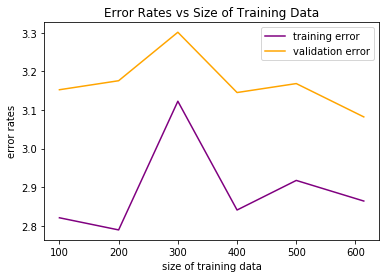

In [107]:
# your code

total = set(train)
number = np.array([100,200,300,400,500,len(train)])
train_error = np.zeros(6)
test_error = np.zeros(6)
for i,num in enumerate(number):
    
    training = sorted(random.sample(total,num))
    x = data.iloc[training,:-1].values
    y = data.iloc[training,-1].values
    
    LinearRegressionModel.fit(x, y)
    
    z = LinearRegressionModel.predict(x)
    z_1 = LinearRegressionModel.predict(X_1)
    train_error[i] = np.sqrt(np.mean((z - y) ** 2))
    test_error[i] = np.sqrt(np.mean((z_1 - y_1) ** 2))
    
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(number, train_error, color='purple',label='training error')
ax.plot(number, test_error, color='orange',label='validation error')
ax.legend()
ax.set_xlabel('size of training data')
ax.set_ylabel('error rates')
plt.title("Error Rates vs Size of Training Data")

d = {'Number': number, 'Training Error':  train_error, 
                     'Validation Error':  test_error}
df = pd.DataFrame(data=d)
df

**Comment:** From the plot above, the validation error seems to increase as the amount of training error increases. They also both tend to decrease as the number of training data increases.

## Part 2 - Classification


__CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.

Here the model is trained to classify each instance into a set of predefined discrete classes. On inputting a feature vector into the model, the trained model is able to predict a class of that instance.


#### Q2.1
Bucket the values of 'y1' i.e 'Heating Load'  from the original dataset into 3 classes:

0: 'Low' ( < 14),   
1: 'Medium'  (14-28),   
2: 'High'  (>28)

**HINT:** Use pandas.cut

This converts the given dataset  into a classification problem. Use this dataset with transformed 'heating load' to create a **logistic regression** classifiction model that predicts heating load type of a building. Split the data randomly into training and test set. Train the model on 80% of the data (80-20 split).


In [131]:
# your code

bins = pd.IntervalIndex.from_tuples([(0,14),(14,28),(28,50)])
cut = pd.cut(data['Y1'],bins,right=False).astype(str)#.map({})

cut = cut.map({'(0, 14]':"Low",'(14, 28]':'Medium','(28, 50]':'High'})
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,:-2],cut,
                                        test_size = 0.2, random_state=100)
model = linear_model.LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Q2.2 
- Print the training and test accuracies
- Print the confusion matrix
- Print the precision and recall numbers for all the classes


In [137]:
# your code
training_accuracy=LogisticRegressionModel.score(x_train,y_train)
print ('training accuracy:',training_accuracy)
test_accuracy=LogisticRegressionModel.score(x_test,y_test)
print('testing accuracy: ',test_accuracy)
print("")
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = LogisticRegressionModel.predict(x_test)
ConfusionMatrix=pd.DataFrame(confusion_matrix(y_true, y_pred),
            columns=['Predicted 0','Predicted 1','Predicted 2'],
                    index=['Actual 0','Actual 1','Actual 2'])
print ('Confusion matrix of test data is: \n',ConfusionMatrix)

y_t1 = y_train
y_pred1 = LogisticRegressionModel.predict(x_train)
ConfusionMatrix=pd.DataFrame(confusion_matrix(y_t1, y_pred1),
            columns=['Predicted 0','Predicted 1','Predicted 2'],
                    index=['Actual 0','Actual 1','Actual 2'])
print ('Confusion matrix of train data is: \n',ConfusionMatrix)


print ("")
# prec0 = (ConfusionMatrix['Predicted 0'][0] / 
#          (ConfusionMatrix['Predicted 0'][0] +
#           ConfusionMatrix['Predicted 0'][1]))
    
# prec1 = (ConfusionMatrix['Predicted 1'][1] / 
#          (ConfusionMatrix['Predicted 1'][0] +
#           ConfusionMatrix['Predicted 1'][1]))

# prec2 = (ConfusionMatrix['Predicted 2'][2] / 
#          (ConfusionMatrix['Predicted 2'][2] +
#           ConfusionMatrix['Predicted 2'][1]))

# rec0 = (ConfusionMatrix['Predicted 0'][0] / 
#         (ConfusionMatrix['Predicted 0'][0] +
#          ConfusionMatrix['Predicted 1'][0]))
    
# rec1 = (ConfusionMatrix['Predicted 1'][1] / 
#         (ConfusionMatrix['Predicted 0'][1] + 
#          ConfusionMatrix['Predicted 1'][1] +
#          ConfusionMatrix['Predicted 2'][1]))

# rec2 =  (ConfusionMatrix['Predicted 2'][2] / 
#          (ConfusionMatrix['Predicted 2'][2] + 
#           ConfusionMatrix['Predicted 1'][2]))

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))
print(classification_report(y_t1, y_pred1))

#print("Precision 0: ", prec0, " Recall 0: ", rec0)
##print("Precision 1: ", prec1, " Recall 1: ", rec1)
###print("Precision 2: ", prec2, " Recall 2: ", rec2)

training accuracy: 0.8371335504885994
testing accuracy:  0.8376623376623377

Confusion matrix of test data is: 
           Predicted 0  Predicted 1  Predicted 2
Actual 0           38            5            0
Actual 1            2           37           17
Actual 2            0            1           54
Confusion matrix of train data is: 
           Predicted 0  Predicted 1  Predicted 2
Actual 0          157           18            0
Actual 1           29          132           50
Actual 2            0            3          225

              precision    recall  f1-score   support

           0       0.95      0.88      0.92        43
           1       0.86      0.66      0.75        56
           2       0.76      0.98      0.86        55

   micro avg       0.84      0.84      0.84       154
   macro avg       0.86      0.84      0.84       154
weighted avg       0.85      0.84      0.83       154

              precision    recall  f1-score   support

           0       0.84      

#### Q2.3
##### K Fold Cross Validation

 In k-fold cross-validation, the shuffled training data is partitioned into k disjoint sets and the model is trained on k −1 sets and validated on the kth set. This process is repeated k times with each set chosen as the validation set once. The cross-validation accuracy is reported as the average accuracy of the k iterations
 
__Use 7-fold cross validation on the training data. Print the average accuracy__

In [133]:
# your code

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=100)

from sklearn import linear_model
LogisticRegressionModel = linear_model.LogisticRegression()

#LogisticRegressionModel.fit(x_train,y_train)

#training_accuracy=LogisticRegressionModel.score(x_train,y_train)
#print ('training accuracy:',training_accuracy)
#test_accuracy=LogisticRegressionModel.score(x_test,y_test)
#print('testing accuracy: ',test_accuracy)
#print("")

from mxnet import autograd, gluon, init, nd

def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        y_part = y[idx]
        X_part = X[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            #print((y_train))
            X_train = X_train.append(X_part)
            y_train = y_train.append(y_part)
    return X_train, y_train, X_valid, y_valid

def k_fold(k, X_train, y_train):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        LogisticRegressionModel.fit(data[0],data[1])
        training_accuracy=LogisticRegressionModel.score(data[0],data[1])
        test_accuracy=LogisticRegressionModel.score(data[2],data[3])
        print('fold %d, train rmse: %f, valid rmse: %f' % (
            i, training_accuracy, test_accuracy))
        train_l_sum += training_accuracy
        valid_l_sum += test_accuracy
    return train_l_sum / k, valid_l_sum / k

#k, num_epochs, lr, weight_decay, batch_size = 6, 50, 6, 0, 100
train_l, valid_l = k_fold(7, x_train, y_train)

print("Train RMSE: ", train_l)
print("Valid RMSE: ", valid_l)


    
 

fold 0, train rmse: 0.777778, valid rmse: 0.770115
fold 1, train rmse: 0.800766, valid rmse: 0.816092
fold 2, train rmse: 0.802682, valid rmse: 0.689655
fold 3, train rmse: 0.793103, valid rmse: 0.827586
fold 4, train rmse: 0.793103, valid rmse: 0.816092
fold 5, train rmse: 0.816092, valid rmse: 0.793103
fold 6, train rmse: 0.789272, valid rmse: 0.747126
Train RMSE:  0.7961138478379858
Valid RMSE:  0.779967159277504


C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\skl

__Q2.4__

One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. 
This makes training less sensitive to the scale of features . 
Scaling is important in algorithms that use distance functions as a part of classification. If we Scale features in the range [0,1] it is called unity based normalization.

__Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.__  

refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

In [134]:
# your code

#print(type(x_train))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=100)
#print(x_train)


from sklearn import preprocessing
x_train = preprocessing.scale(x_train)

x_train = pd.DataFrame(x_train,
                    columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'])
#x_train

#type(x_train)
x_test = preprocessing.scale(x_test)
x_test = pd.DataFrame(x_test,
                    columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'])


from sklearn import linear_model
LogisticRegressionModel = linear_model.LogisticRegression()

#LogisticRegressionModel.fit(x_train,y_train)

#training_accuracy=LogisticRegressionModel.score(x_train,y_train)
#print ('training accuracy:',training_accuracy)
#test_accuracy=LogisticRegressionModel.score(x_test,y_test)
#print('testing accuracy: ',test_accuracy)
#print("")


def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        y_part = y[idx]
        X_part = X[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            #print((X_train))
            #X_train = X_train.asnumpy()
            X_train = X_train.append(X_part)
            y_train = y_train.append(y_part)
    return X_train, y_train, X_valid, y_valid

def k_fold(k, X_train, y_train):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        LogisticRegressionModel.fit(data[0],data[1])
        training_accuracy=LogisticRegressionModel.score(data[0],data[1])
        test_accuracy=LogisticRegressionModel.score(data[2],data[3])
        print('fold %d, train rmse: %f, valid rmse: %f' % (
            i, training_accuracy, test_accuracy))
        train_l_sum += training_accuracy
        valid_l_sum += test_accuracy
    return train_l_sum / k, valid_l_sum / k

#k, num_epochs, lr, weight_decay, batch_size = 6, 50, 6, 0, 100
train_l, valid_l = k_fold(7, x_train, y_train)

print("Train RMSE: ", train_l)
print("Valid RMSE: ", valid_l)

fold 0, train rmse: 0.818008, valid rmse: 0.839080
fold 1, train rmse: 0.839080, valid rmse: 0.873563
fold 2, train rmse: 0.844828, valid rmse: 0.735632
fold 3, train rmse: 0.852490, valid rmse: 0.827586
fold 4, train rmse: 0.837165, valid rmse: 0.850575
fold 5, train rmse: 0.858238, valid rmse: 0.816092
fold 6, train rmse: 0.840996, valid rmse: 0.816092
Train RMSE:  0.841543513957307
Valid RMSE:  0.8226600985221675


C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\sklearn\linear_model\logistic.